In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.preprocessing import LabelEncoder

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyberguard/test1.csv
/kaggle/input/cyberguard/train1.csv
/kaggle/input/final-train-cybergraud/final_train.csv


In [2]:
# CLEANING THE DATASET
# 1. removing all duplicates
df = pd.read_csv('/kaggle/input/final-train-cybergraud/final_train.csv')
df

,Unnamed: 0,category,sub_category,crimeaditionalinfo
0,0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...,...
96585,96585,Online Gambling Betting,Online Gambling Betting,Hume ne Chrome browser par ek fake massage mil...
96586,96586,Online Gambling Betting,Online Gambling Betting,"Ek Android mobile app, ShareHash, tha Google P..."
96587,96587,Online Gambling Betting,Online Gambling Betting,Mere personal information aur contact details ...
96588,96588,Online Gambling Betting,Online Gambling Betting,Amit ka naam hai aur uska mobil no hai aur hum...


In [3]:
df = df[~df['category'].isin(['Online Financial Fraud', 'Report Unlawful Content'])]
df

,Unnamed: 0,category,sub_category,crimeaditionalinfo
0,0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
2,2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
8,8,RapeGang Rape RGRSexually Abusive Content,NaN,I got the message on Whatsapp to my number The...
9,9,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as A...
...,...,...,...,...
96585,96585,Online Gambling Betting,Online Gambling Betting,Hume ne Chrome browser par ek fake massage mil...
96586,96586,Online Gambling Betting,Online Gambling Betting,"Ek Android mobile app, ShareHash, tha Google P..."
96587,96587,Online Gambling Betting,Online Gambling Betting,Mere personal information aur contact details ...
96588,96588,Online Gambling Betting,Online Gambling Betting,Amit ka naam hai aur uska mobil no hai aur hum...


In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
tokenizer = AutoTokenizer.from_pretrained('l3cube-pune/hing-roberta')

tokenizer_config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
df = df.dropna(subset=['crimeaditionalinfo', 'category'])
label_encoder = LabelEncoder()
# df['label'] = label_encoder.fit_transform(df['category'])
df.loc[:, 'label'] = label_encoder.fit_transform(df['category'])

/tmp/ipykernel_23/1944483998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'label'] = label_encoder.fit_transform(df['category'])


In [6]:
# Shuffle the entire DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
df_binary = df.copy()
df_binary['length'] = df_binary['crimeaditionalinfo'].str.len()
df_binary

,Unnamed: 0,category,sub_category,crimeaditionalinfo,label,length
0,14469,Cyber Attack/ Dependent Crimes,Malware Attack,I never imagined something like this could hap...,3,820
1,5422,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,hangout account ldMad Hangout ID ...,8,157
2,31037,Any Other Cyber Crime,Other,Sir madam\r\n\r\nIt has linkage with other r...,0,1070
3,35659,Online and Social Media Related Crime,FakeImpersonating Profile,I see a product on instagram and i like the pr...,8,197
4,94685,Sexually Explicit Act,NaN,"Mujhe Seema Kumari ki zaroorat hai, mera biwi ...",11,332
...,...,...,...,...,...,...
39147,16008,Online and Social Media Related Crime,Profile Hacking Identity Theft,Hello SirMam I am Aniket HiwaraleI need your h...,8,527
39148,28992,Any Other Cyber Crime,Other,Mrs Sita Devi Addvillgamharpur popurnadih\r\np...,0,585
39149,95596,Sexually Explicit Act,NaN,"Mainne HDFC Bank account se Rs. loss kiya hai,...",11,224
39150,2142,Child Pornography CPChild Sexual Abuse Materia...,NaN,He is blackmailing me And he is torchring me p...,1,235


(array([6.4050e+03, 1.5567e+04, 5.3360e+03, 5.8580e+03, 1.5070e+03,
        8.0400e+02, 3.5660e+03, 9.9000e+01, 8.0000e+00, 2.0000e+00]),
 array([   4. ,  213.7,  423.4,  633.1,  842.8, 1052.5, 1262.2, 1471.9,
        1681.6, 1891.3, 2101. ]),
 <BarContainer object of 10 artists>)

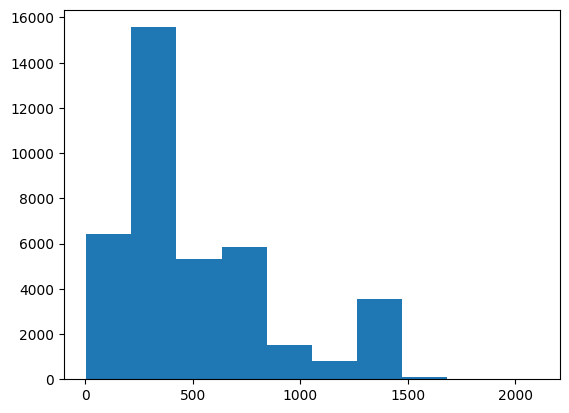

In [8]:
import matplotlib.pyplot as plt
plt.hist(df_binary['length'])

In [9]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['crimeaditionalinfo'].tolist(), df['label'].tolist(), test_size=0.1, random_state=42
)

In [10]:
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
print('done')

done


In [11]:
 class FraudDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = FraudDataset(train_encodings, train_labels)
val_dataset = FraudDataset(val_encodings, val_labels)

In [12]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [13]:
binary_model = AutoModelForSequenceClassification.from_pretrained('l3cube-pune/hing-roberta', num_labels=len(label_encoder.classes_))

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    save_steps=10_000,
    save_total_limit=2,
    report_to=[]
)

trainer = Trainer(
    model=binary_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/hing-roberta and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.023100,1.004212
2,0.931100,0.966062
3,0.839600,0.952869
4,0.710400,1.015490
5,0.607200,1.051102


TrainOutput(global_step=22025, training_loss=0.8468005229936961, metrics={'train_runtime': 10727.1515, 'train_samples_per_second': 16.424, 'train_steps_per_second': 2.053, 'total_flos': 4.635948395526144e+16, 'train_loss': 0.8468005229936961, 'epoch': 5.0})

In [14]:
from sklearn.metrics import classification_report

# Get predictions on the validation set
predictions = trainer.predict(val_dataset)

# Extract predicted class labels
pred_labels = predictions.predictions.argmax(-1)

# Extract true labels from val_dataset
# true_labels = [label for label in val_dataset['labels']]
unique_labels_in_val = list(set(val_labels))

# Generate and print the classification report
print(classification_report(val_labels, pred_labels,labels=unique_labels_in_val, target_names=label_encoder.classes_))

                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.64      0.70      0.67      1027
Child Pornography CPChild Sexual Abuse Material CSAM       0.62      0.35      0.45        37
                                Cryptocurrency Crime       0.52      0.64      0.57        42
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       383
                                     Cyber Terrorism       0.82      0.47      0.60        59
      Hacking  Damage to computercomputer system etc       0.38      0.37      0.37       151
                            Online Cyber Trafficking       0.74      0.37      0.49        46
                            Online Gambling  Betting       0.74      0.55      0.63       104
               Online and Social Media Related Crime       0.62      0.69      0.65      1253
                                          Ransomware       

In [15]:
import pandas as pd
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/kaggle/input/cyberguard/test1.csv')
df = df.dropna(subset=['crimeaditionalinfo', 'category'])


# Filter out specific categories
df = df[~df['category'].isin(['Online Financial Fraud', 'Crime Against Women & Children'])]
# Encode the labels
df['label'] = label_encoder.transform(df['category'])  # Ensure label_encoder is defined and fitted

# Prepare the text and tokenize
text = df['crimeaditionalinfo']  # Check for correct column name
test_encoding = tokenizer(text.tolist(), truncation=True, padding=True, max_length=512)  # Convert to list if necessary

# Extract labels
labels = df['label'].tolist()  # Ensure this is a list

# Create the dataset
test = FraudDataset(test_encoding, labels)

# Get predictions on the test set
predictions = trainer.predict(test)

# Extract predicted class labels
pred_labels = predictions.predictions.argmax(-1)

# Generate and print the classification report
unique_labels_in_val = list(set(labels))  # Ensure unique labels for report
print(classification_report(labels, pred_labels, labels=unique_labels_in_val, target_names=label_encoder.classes_))

                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.67      0.70      0.69      3670
Child Pornography CPChild Sexual Abuse Material CSAM       0.61      0.37      0.46       123
                                Cryptocurrency Crime       0.66      0.81      0.73       166
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00      1261
                                     Cyber Terrorism       0.29      0.04      0.07        52
      Hacking  Damage to computercomputer system etc       0.43      0.42      0.42       592
                            Online Cyber Trafficking       0.00      0.00      0.00        61
                            Online Gambling  Betting       0.43      0.24      0.31       134
               Online and Social Media Related Crime       0.62      0.70      0.66      4139
                                          Ransomware       

In [16]:
binary_model.save_pretrained('./saved_model_1_part2_nopre_0.67_score')